In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

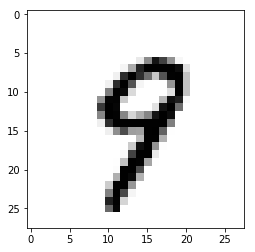

In [8]:
plt.imshow(x_train[423], cmap='Greys')

In [9]:
y_train[423]

9

In [10]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [11]:
from keras.utils import np_utils

In [12]:
y_train = np_utils.to_categorical(y_train,10)

In [13]:
y_test = np_utils.to_categorical(y_test,10)

In [14]:
y_train[423]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [16]:
model = Sequential()

### 把units改為256，Activation function 改為tanh(x)

In [50]:
model.add(Dense(256, input_dim=784))
model.add(Activation('tanh'))

In [51]:
model.add(Dense(256))
model.add(Activation('tanh'))

In [52]:
model.add(Dense(10))
model.add(Activation('softmax'))

### lr改為0.01

In [62]:
model.compile(loss='mse', optimizer=SGD(lr=0.01), metrics=['accuracy'])

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               5500      
__________

### 更改batch size跟epochs

In [64]:
model.fit(x_train, y_train, batch_size=90, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 19s 314us/step - loss: 0.0066 - acc: 0.9591
Epoch 2/15
60000/60000 [==============================] - 17s 282us/step - loss: 0.0060 - acc: 0.9634
Epoch 3/15
60000/60000 [==============================] - 18s 296us/step - loss: 0.0056 - acc: 0.9665
Epoch 4/15
60000/60000 [==============================] - 18s 298us/step - loss: 0.0053 - acc: 0.9678
Epoch 5/15
60000/60000 [==============================] - 18s 301us/step - loss: 0.0050 - acc: 0.9698
Epoch 6/15
60000/60000 [==============================] - 18s 306us/step - loss: 0.0048 - acc: 0.9705
Epoch 7/15
60000/60000 [==============================] - 18s 301us/step - loss: 0.0046 - acc: 0.9720
Epoch 8/15
60000/60000 [==============================] - 18s 301us/step - loss: 0.0045 - acc: 0.9727
Epoch 9/15
60000/60000 [==============================] - 18s 302us/step - loss: 0.0043 - acc: 0.9731
Epoch 10/15
60000/60000 [==============================] - 18s 306us/step - loss: 

In [24]:
from ipywidgets import interact_manual

In [65]:
predict = model.predict_classes(x_test)

In [66]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 178us/step


In [67]:
print('Accuracy rate:', score[1])

Accuracy rate: 0.954
